## Hate Crime 
## Nora Grigoryan 


# Description 

We have data about hate crime in USA.
<br>
What is a hate crime ? Hate crime is a crime, which based on the hate of specified race,religion,sex,ethnicy.
<br>
We have the main columns: DATA_YEAR describes the year when the crime was commited.
<br>
THE_OFFENDER_RACE(the race of the person who commited the crime)
<br>
VICTIM_COUNT(how many victims we have)
<br>
OFFENSE_NAME(the crime description-robbery, intimidation and etc.)
<br>
BIAS_DESC describes the purpose of the crime(anti black or ani white)
<br>
MULTIPLE_OFFENSE- this column describe how many offenses were commited(s-single  if m -multiple)
<br>
MULTIPLE_BIAS - for how many bias they commited the crime 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import math

## Data Cleaning 

In [63]:
data = pd.read_csv('hate_crime.csv',low_memory =False)

In [64]:
data.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S


In [65]:
# drop the columns that we don't need 

data_new = data.drop(columns = ['ORI','PUB_AGENCY_NAME','PUB_AGENCY_UNIT','STATE_ABBR','DIVISION_NAME','POPULATION_GROUP_CODE','ADULT_VICTIM_COUNT',
                   'JUVENILE_VICTIM_COUNT','OFFENDER_ETHNICITY','ADULT_OFFENDER_COUNT','JUVENILE_OFFENDER_COUNT'])
data_new.head()

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,City,Arkansas,South,"Cities from 10,000 thru 24,999",31-Aug-91,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",4-Jul-91,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",24-Dec-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",23-Dec-91,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",27-Jul-91,1,Black or African American,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S


In [66]:
# after dropping the columns, we drope the na-s in the data 

data_new = data_new.dropna()
data_new

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,City,Arkansas,South,"Cities from 10,000 thru 24,999",31-Aug-91,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",4-Jul-91,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",24-Dec-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",23-Dec-91,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",27-Jul-91,1,Black or African American,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168080,713162,2019,State Police,West Virginia,South,"MSA counties under 10,000",5-Jun-19,0,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Other Religion,Individual,S,S
168081,713164,2019,State Police,West Virginia,South,"MSA counties under 10,000",17-Nov-19,0,Unknown,1,All Other Larceny,1.0,Residence/Home,Anti-Jewish,Individual,S,S
168082,558879,2019,City,Wyoming,West,"Cities from 25,000 thru 49,999",19-Aug-19,0,Unknown,1,Intimidation,1.0,Government/Public Building,Anti-Gay (Male),Individual,S,S
168084,661208,2019,City,Wyoming,West,"Cities from 2,500 thru 9,999",5-Apr-19,1,American Indian or Alaska Native,1,All Other Larceny,1.0,Parking/Drop Lot/Garage,"Anti-Multiple Races, Group",Individual,S,S


In [67]:
#Now we are  intersting in outliers which may occure in data, 
#that's why  we find the max value and the mean to compare  max value with  the mean 
#we are interesting in totatl offender count (person who offend the crime)

data_new['TOTAL_OFFENDER_COUNT'].max()


99

In [68]:
data_new['TOTAL_OFFENDER_COUNT'].idxmax()

14653

In [69]:
data_new['TOTAL_OFFENDER_COUNT'].mean()

0.8561214560706882

Text(0.5, 0, 'Incident Date')

<Figure size 864x216 with 0 Axes>

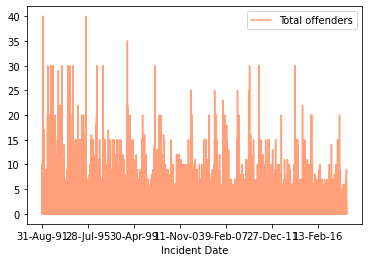

In [118]:
#After compare max value and the mean , we understand that 99 is outlier and to find 
#other outliers we need to visualize our data 


plt.figure(figsize=(12,3))
data_new.plot(x = 'INCIDENT_DATE', y = 'TOTAL_OFFENDER_COUNT',color ='lightsalmon',label = 'Total offenders')
plt.xlabel('Incident Date')


In [71]:
#after visualizing we understand that we have several outliers 
# we need to find them, that's why we try to find 20 largest numbers and their indexes to drop them in the next step 


data_new['TOTAL_OFFENDER_COUNT'].nlargest(20)

14653    99
36011    99
19718    75
4815     50
4857     50
38217    50
38218    50
61576    50
61727    50
401      40
23897    40
46323    35
3045     30
4620     30
5631     30
5870     30
10712    30
10720    30
10721    30
10772    30
Name: TOTAL_OFFENDER_COUNT, dtype: int64

In [72]:
data_new=data_new.drop(data_new.index[[14653,36011,19718,4815,4857,38217,38218,61576,61727]])
data_new.head()

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,City,Arkansas,South,"Cities from 10,000 thru 24,999",31-Aug-91,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",4-Jul-91,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",24-Dec-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",23-Dec-91,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",27-Jul-91,1,Black or African American,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S


In [73]:
#after dropping largest numbers we want to find the max value and visulize 
#to assure that our columns became more balanced 

data_new['TOTAL_OFFENDER_COUNT'].max()

40

Text(0.5, 0, 'Incident Date')

<Figure size 864x216 with 0 Axes>

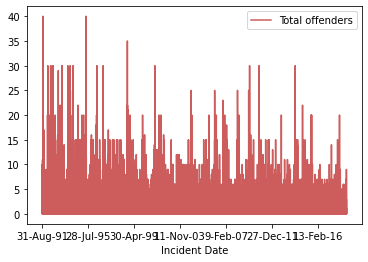

In [119]:
plt.figure(figsize=(12,3))
data_new.plot(x = 'INCIDENT_DATE', y = 'TOTAL_OFFENDER_COUNT',color = 'indianred',label ='Total offenders')
plt.xlabel('Incident Date')

In [75]:
data_new['TOTAL_OFFENDER_COUNT'].nlargest(5)

401      40
23897    40
46323    35
3045     30
4620     30
Name: TOTAL_OFFENDER_COUNT, dtype: int64

count    165442.000000
mean          0.852710
std           1.259071
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          40.000000
Name: TOTAL_OFFENDER_COUNT, dtype: float64


Text(0.5, 0, 'Total offenders')

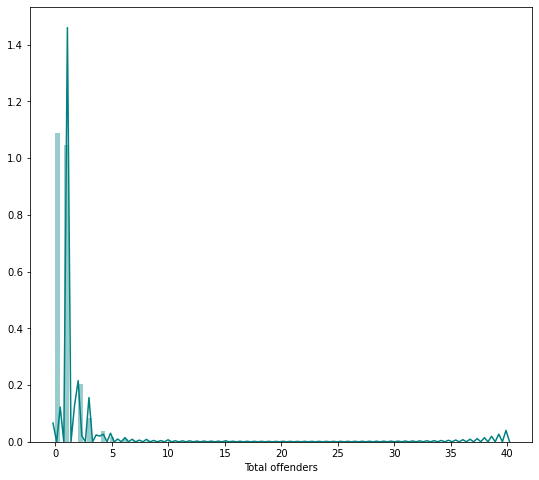

In [120]:
#now we are interesting in distribution of offender counts
# to understand the most popular number of offender who commited the crime


print(data_new['TOTAL_OFFENDER_COUNT'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data_new['TOTAL_OFFENDER_COUNT'],bins = 100,color = 'teal');
plt.xlabel('Total offenders')

In [77]:
data_new.isnull().any().any()

False

In [78]:
type(data_new)

pandas.core.frame.DataFrame

Text(0.5, 0, 'Incident date')

<Figure size 864x216 with 0 Axes>

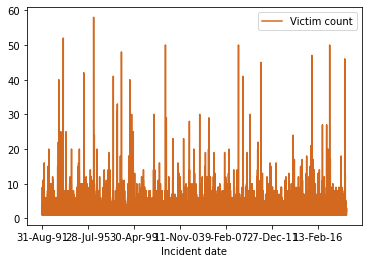

In [121]:
# also we are interesting in victims that's why we are trying to do the same steps for victims 

plt.figure(figsize=(12,3))
data_new.plot(x = 'INCIDENT_DATE', y = 'VICTIM_COUNT',color='chocolate',label = 'Victim count')
plt.xlabel('Incident date')

In [80]:
data_new['VICTIM_COUNT'].nlargest(20)

152115    200
44787     147
4031      100
15758     100
21217      90
101504     80
158019     80
147178     75
27981      58
11484      52
67019      50
106730     50
157362     50
43098      48
146614     47
167112     46
118901     45
22617      42
38679      41
109156     41
Name: VICTIM_COUNT, dtype: int64

In [81]:
data_new.drop([152115,44787,4031,15758,21217,101504,158019,147178],inplace = True)


In [82]:
data_new.head()

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,City,Arkansas,South,"Cities from 10,000 thru 24,999",31-Aug-91,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,43,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",4-Jul-91,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
2,44,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",24-Dec-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
3,3017,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",23-Dec-91,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
4,3018,1991,City,Arkansas,South,"Cities from 50,000 thru 99,999",27-Jul-91,1,Black or African American,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S


In [83]:
data_new['VICTIM_COUNT'].nlargest(5)

27981     58
11484     52
67019     50
106730    50
157362    50
Name: VICTIM_COUNT, dtype: int64

Text(0.5, 0, 'Incident Date')

<Figure size 864x216 with 0 Axes>

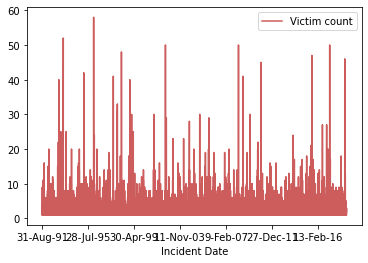

In [84]:
plt.figure(figsize=(12,3))
data_new.plot(x = 'INCIDENT_DATE', y = 'VICTIM_COUNT',color = 'indianred',label ='Victim count')
plt.xlabel('Incident Date')

## Summary of Data Cleaning 

We have done the data cleaning.First of all we determine the important clolumns and after that we droped the columns we didn't need. We have also droped the NaN values, which means we have droped the rows that contain NaN values. We found outliers by comparing the max values with the mean and with visualization. We droped the outliers from two columns that we are interesting in.

# Exploratory Data Analysis 

In [85]:
data_new.describe()

,INCIDENT_ID,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,165442.000000,165442.000000,165442.000000,165442.000000,165442.000000
mean,130590.061683,2004.340953,0.852710,1.256827,0.937567
std,143919.979883,8.012613,1.259071,0.951287,0.995818
min,2.000000,1991.000000,0.000000,1.000000,0.000000
25%,50061.250000,1998.000000,0.000000,1.000000,0.000000
50%,100902.000000,2004.000000,1.000000,1.000000,1.000000
75%,152242.250000,2011.000000,1.000000,1.000000,1.000000
max,727695.000000,2019.000000,40.000000,58.000000,58.000000


In [86]:
data_new.nunique()

INCIDENT_ID                 165442
DATA_YEAR                       29
AGENCY_TYPE_NAME                 8
STATE_NAME                      53
REGION_NAME                      6
POPULATION_GROUP_DESC           20
INCIDENT_DATE                10591
TOTAL_OFFENDER_COUNT            28
OFFENDER_RACE                    7
VICTIM_COUNT                    41
OFFENSE_NAME                    44
TOTAL_INDIVIDUAL_VICTIMS        38
LOCATION_NAME                  122
BIAS_DESC                      188
VICTIM_TYPES                    53
MULTIPLE_OFFENSE                 2
MULTIPLE_BIAS                    2
dtype: int64

In [87]:
#find the race of offenders 

data_new['OFFENDER_RACE'].unique()

array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [88]:
# first, we are interesting in the number of victims for each year 
# and we group the victim counts by year and visualize the data with barplot
# to understand in which year we have the biggest number of victims 


data1=data_new.groupby(['DATA_YEAR']).sum()[['VICTIM_COUNT']]
data1.head()

,VICTIM_COUNT
DATA_YEAR,
1991,4786
1992,6841
1993,7692
1994,6143
1995,8753


<Figure size 1584x504 with 0 Axes>

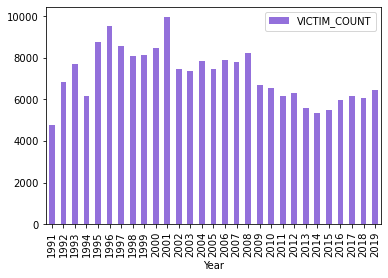

In [122]:
plt.figure(figsize=(22,7))
data1.plot(kind = 'bar',color ='mediumpurple',label = 'Victim count')
plt.xlabel('Year')
plt.show()

In [90]:
# after looking at this plot we see that the we have the biggest number of victims in 
#1995,1996,1997,1998,2000,2001 years 

#but also we need to consider not only the number of victims but also number of cases 
# because in one case we can have 200 victims which can rise the number in that year


data1_large = data1['VICTIM_COUNT'].nlargest(6)
data1_large

DATA_YEAR
2001    9952
1996    9513
1995    8753
1997    8586
2000    8489
2008    8213
Name: VICTIM_COUNT, dtype: int64

In [91]:
# we count our incident id and group them by year to have the count of the crimes for each year 

data2=data_new.groupby(['DATA_YEAR']).count()[['INCIDENT_ID']]
data2.head()

,INCIDENT_ID
DATA_YEAR,
1991,3823
1992,5415
1993,6158
1994,4917
1995,6534


Text(0.5, 0, 'Year')

<Figure size 1584x504 with 0 Axes>

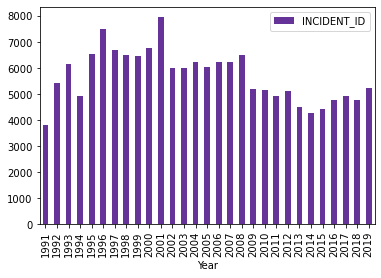

In [123]:
plt.figure(figsize=(22,7))
data2.plot(kind = 'bar',color ='rebeccapurple', label = 'Incident id')
plt.xlabel('Year')

In [93]:
#now we see that we have the biggest number of caess in 1995,1996,1997,2000,2001,2008 years 

data2['INCIDENT_ID'].nlargest(6)

DATA_YEAR
2001    7959
1996    7488
2000    6795
1997    6717
1995    6534
2008    6520
Name: INCIDENT_ID, dtype: int64

In [94]:
# now we filter 1995,1996,1997,1998,2000,2001,2008 years to understand in which states we have these cases 

filter_list = [1995,1996,1997,1998,2000,2001,2008 ]
filtered_data1 = data_new[data_new['DATA_YEAR'].isin(filter_list)]
filtered_data1.head()

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
20319,29565,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",5-Mar-95,1,White,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
20320,29567,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",13-Jun-95,0,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Parking/Drop Lot/Garage,Anti-American Indian or Alaska Native,Individual,S,S
20321,29568,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",21-Sep-95,1,White,1,Intimidation,1.0,Commercial/Office Building,Anti-Black or African American,Individual,S,S
20322,29569,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",27-Sep-95,1,White,1,Intimidation,1.0,Residence/Home,"Anti-Multiple Races, Group",Individual,S,S
20323,29571,1995,City,Alaska,West,"Cities from 250,000 thru 499,999",30-Oct-95,3,White,2,Aggravated Assault,2.0,Parking/Drop Lot/Garage,Anti-Black or African American,Individual,S,S


In [95]:
# we group by year and the state name

filtered_data = filtered_data1.groupby(['DATA_YEAR','STATE_NAME']).count()[['INCIDENT_ID']]
filtered_data.head()

INCIDENT_ID
DATA_YEAR STATE_NAME             
1995      Alaska                6
          Arizona             179
          Arkansas              6
          California         1480
          Colorado            125

In [96]:
filtered_data = filtered_data.unstack()
filtered_data

INCIDENT_ID                                              \
STATE_NAME     Alabama Alaska Arizona Arkansas California Colorado   
DATA_YEAR                                                            
1995               NaN    6.0   179.0      6.0     1480.0    125.0   
1996               NaN    8.0   198.0      1.0     1738.0    115.0   
1997               NaN    9.0   246.0      NaN     1520.0     94.0   
1998               NaN    NaN   230.0      1.0     1379.0    104.0   
2000               NaN    4.0   231.0      3.0     1583.0     85.0   
2001               NaN   18.0   313.0      3.0     1729.0    106.0   
2008               9.0    6.0   150.0     66.0     1149.0    134.0   

                                                              ...  \
STATE_NAME Connecticut Delaware District of Columbia Florida  ...   
DATA_YEAR                                                     ...   
1995              82.0     34.0                  2.0   141.0  ...   
1996             102.0     64.0                 12.0   151.0  ...   
1997             108.0     50.0                  6.0   106.0  ...   
1998             109.0     18.0                  4.0   153.0  ...   
2000             150.0     31.0                  3.0   192.0  ...   
2001             157.0     15.0                  8.0   256.0  ...   
2008             153.0     55.0                 26.0   124.0  ...   

                                                                            \
STATE_NAME South Dakota Tennessee  Texas  Utah Vermont Virginia Washington   
DATA_YEAR                                                                    
1995                4.0      11.0  248.0  75.0     5.0     50.0      224.0   
1996                1.0      27.0  253.0  42.0     2.0     90.0      164.0   
1997               15.0      44.0  242.0  39.0     3.0     81.0      155.0   
1998                8.0      56.0  240.0  53.0     3.0    123.0      194.0   
2000                4.0     184.0  236.0  56.0    14.0    239.0      195.0   
2001                1.0     147.0  364.0  50.0    10.0    268.0      232.0   
2008               31.0     217.0  201.0  27.0    16.0    205.0      198.0   

                                            
STATE_NAME West Virginia Wisconsin Wyoming  
DATA_YEAR                                   
1995                 NaN      35.0     6.0  
1996                 4.0      30.0     4.0  
1997                 2.0      33.0     3.0  
1998                13.0       NaN     5.0  
2000                48.0      33.0     8.0  
2001                27.0      43.0     7.0  
2008                33.0      67.0     6.0  

[7 rows x 50 columns]

In [97]:
# ufter unstack we sort them to find the states that have the most cases in that years 

b = filtered_data.sort_values(by = [1997, 2001], axis = 1,ascending = False)
b

INCIDENT_ID                                                      \
STATE_NAME  California New York New Jersey Massachusetts Michigan Maryland   
DATA_YEAR                                                                    
1995            1480.0    739.0      694.0         302.0    288.0    286.0   
1996            1738.0    890.0      767.0         420.0    388.0    333.0   
1997            1520.0    800.0      639.0         404.0    335.0    276.0   
1998            1379.0    677.0      705.0         409.0    287.0    239.0   
2000            1583.0    601.0      603.0         396.0    321.0    175.0   
2001            1729.0    693.0      717.0         494.0    332.0    200.0   
2008            1149.0    483.0      707.0         273.0    444.0     88.0   

                                           ...                            \
STATE_NAME Arizona  Texas Illinois   Ohio  ... Vermont Louisiana Wyoming   
DATA_YEAR                                  ...                             
1995         179.0  248.0     94.0  186.0  ...     5.0       7.0     6.0   
1996         198.0  253.0    262.0  189.0  ...     2.0       3.0     4.0   
1997         246.0  242.0    238.0  213.0  ...     3.0       3.0     3.0   
1998         230.0  240.0    203.0  197.0  ...     3.0       6.0     5.0   
2000         231.0  236.0    134.0  190.0  ...    14.0       9.0     8.0   
2001         313.0  364.0    196.0  292.0  ...    10.0       9.0     7.0   
2008         150.0  201.0    100.0  277.0  ...    16.0      46.0     6.0   

                                                                       \
STATE_NAME Nebraska West Virginia North Dakota New Hampshire Arkansas   
DATA_YEAR                                                               
1995            NaN           NaN          2.0          24.0      6.0   
1996            2.0           4.0          NaN           NaN      1.0   
1997            2.0           2.0          1.0           NaN      NaN   
1998           33.0          13.0          1.0          13.0      1.0   
2000           14.0          48.0          3.0          25.0      3.0   
2001           33.0          27.0         10.0          24.0      3.0   
2008           68.0          33.0         12.0          32.0     66.0   

                                
STATE_NAME Mississippi Alabama  
DATA_YEAR                       
1995               6.0     NaN  
1996               3.0     NaN  
1997               NaN     NaN  
1998               3.0     NaN  
2000               2.0     NaN  
2001               3.0     NaN  
2008               4.0     9.0  

[7 rows x 50 columns]

### Description for future steps


filter states California,New York,New Jersey,Massachusetts,Maryland,Texas
<br>
find the percent of the crime to the population of these states 

find the population data for each state ( the data is for every 10 years )
<br>
$1995-1998$ California = 29760021,New York = 17990455,New Jersey = 7730188, Massachusetts = 6016425 ,Maryland=4781468,
Texas = 16986510
<br>
$2000-2001$ California = 33871648, New York = 18976457,New Jersey = 8414350, Massachusetts = 6349097,Maryland= 5296486,
Texas =20851820
<br>
$2008$ California = 37253956,New York = 19378102,New Jersey =8791894,Massachusetts = 6547629,Maryland=5773552,
Texas = 25145561
<br>


index 1990-1998,2000-2001,2008
<br>
columns are the percents for each state 

In [98]:
# construct the new data 

#we had the number of crimes for each state by year but the population number we have for each 10 years 
# so we compute the mean for 1990-1999, 2000-2001, and 2008 


mean_california = [b.iloc[0:4,0].mean(),b.iloc[4:6,0].mean(),1149]
mean_new_york = [b.iloc[0:4,1].mean(),b.iloc[4:6,1].mean(),483]
mean_new_jersey = [b.iloc[0:4,2].mean(),b.iloc[4:6,1].mean(),707]
mean_massachusetts = [b.iloc[0:4,3].mean(),b.iloc[4:6,3].mean(),273]
mean_maryland = [b.iloc[0:4,5].mean(),b.iloc[4:6,5].mean(),88]
mean_texas = [b.iloc[0:4,7].mean(),b.iloc[4:6,7].mean(),201]

In [99]:
#compute the percent: we find the percent of crimes in population 

percent_california = [(mean_california[0] / 29760021)*100,mean_california[1]/33871648*100,mean_california[2]/37253956*100]
percent_ny = [(mean_new_york[0] / 17990455)*100,(mean_new_york[1]/18976457)*100,(mean_new_york[2]/19378102)*100]
percent_nj = [(mean_new_jersey[0] /7730188 )*100,(mean_new_jersey[1]/8414350)*100,(mean_new_jersey[2]/8791894)*100]
percent_mas = [(mean_massachusetts[0] / 6016425)*100,(mean_massachusetts[1]/6349097)*100,(mean_massachusetts[2]/6547629)*100]
percent_mary= [(mean_maryland[0] / 4781468)*100,(mean_maryland[1]/5296486)*100,(mean_maryland[2]/5773552)*100]
percent_texas = [(mean_texas[0] /16986510 )*100,(mean_texas[1]/20851820)*100,(mean_texas[2]/ 25145561)*100]
lst = [percent_california,percent_ny,percent_nj,percent_mas,percent_mary,percent_texas ]
lst


[[0.005138605244935815, 0.004889044666501021, 0.003084236208364019],
 [0.004316177661987982, 0.0034094878722619295, 0.002492504167848843],
 [0.009071577560597491, 0.007689245158568398, 0.008041498225524557],
 [0.0063783725385091646, 0.007008870710275807, 0.0041694482078932695],
 [0.005929141426858864, 0.0035400829908735715, 0.0015241916934323966],
 [0.00144673626306993, 0.001438723334461932, 0.0007993458567100572]]

In [100]:
lst= np.array(lst)
lst_new=np.transpose(lst)
lst_new

array([[0.00513861, 0.00431618, 0.00907158, 0.00637837, 0.00592914,
        0.00144674],
       [0.00488904, 0.00340949, 0.00768925, 0.00700887, 0.00354008,
        0.00143872],
       [0.00308424, 0.0024925 , 0.0080415 , 0.00416945, 0.00152419,
        0.00079935]])

In [101]:
df = pd.DataFrame(lst_new, index =['1995-1998', '2000-2001', '2008'], 
                                              columns =['percent_california','percent_ny','percent_nj','percent_mas','percent_mary','percent_texas']) 

In [102]:
# so we get the dataframe where we have the percents for each year period and for each state 
# as we can see the most criminal state is New Jersey 

df

,percent_california,percent_ny,percent_nj,percent_mas,percent_mary,percent_texas
1995-1998,0.005139,0.004316,0.009072,0.006378,0.005929,0.001447
2000-2001,0.004889,0.003409,0.007689,0.007009,0.003540,0.001439
2008,0.003084,0.002493,0.008041,0.004169,0.001524,0.000799


In [103]:
# we pick new jersey,massachusets,california,new york , these states have the highest percents 
#so we filter these states to understand the most popular bias for the crime


filter_list_state = ['California','New York','New Jersey','Massachusetts']
filtered_state = filtered_data1[filtered_data1['STATE_NAME'].isin(filter_list_state)]
filtered_state

,INCIDENT_ID,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
20510,24956,1995,County,California,West,"MSA counties 100,000 or over",22-Jan-95,0,Unknown,4,Destruction/Damage/Vandalism of Property,2.0,Residence/Home,Anti-Other Religion,Individual,M,S
20511,24957,1995,County,California,West,"MSA counties 100,000 or over",10-May-95,0,Unknown,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
20512,24958,1995,County,California,West,"MSA counties 100,000 or over",14-Jul-95,1,Black or African American,2,Intimidation,1.0,Jail/Prison/Penitentiary/Corrections Facility,Anti-White,Individual,M,S
20513,24959,1995,County,California,West,"MSA counties 100,000 or over",18-Nov-95,0,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Asian,Individual,S,S
20514,24942,1995,City,California,West,"Cities from 50,000 thru 99,999",17-Feb-95,1,White,1,Intimidation,1.0,Residence/Home,Anti-Asian,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110436,132267,2008,State Police,New York,Northeast,"MSA counties under 10,000",26-Jun-08,0,Unknown,1,Burglary/Breaking & Entering,1.0,Other/Unknown,Anti-Bisexual,Individual;Other,M,S
110437,132268,2008,State Police,New York,Northeast,"Non-MSA counties under 10,000",3-Apr-08,0,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Other/Unknown,Anti-Bisexual,Individual;Other,M,S
110438,132269,2008,State Police,New York,Northeast,"Non-MSA counties under 10,000",23-Sep-08,0,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Other/Unknown,Anti-Black or African American,Business;Individual,M,S
110439,132270,2008,State Police,New York,Northeast,"MSA counties under 10,000",7-Apr-08,0,Unknown,1,Burglary/Breaking & Entering,1.0,Other/Unknown,Anti-Black or African American,Individual;Other,M,S


In [104]:
filtered_state1 = filtered_state.groupby(['STATE_NAME','BIAS_DESC']).count()[['INCIDENT_ID']]
filtered_state1.head()

INCIDENT_ID
STATE_NAME BIAS_DESC                                         
California Anti-American Indian or Alaska Native           15
           Anti-Asian                                     689
           Anti-Asian;Anti-Gay (Male)                       1
           Anti-Atheism/Agnosticism                         3
           Anti-Bisexual                                    3

In [105]:
filtered_state = filtered_state1.unstack()
filtered_state

INCIDENT_ID                       \
BIAS_DESC     Anti-American Indian or Alaska Native Anti-Arab Anti-Asian   
STATE_NAME                                                                 
California                                     15.0       NaN      689.0   
Massachusetts                                  22.0      37.0      154.0   
New Jersey                                      6.0      95.0       89.0   
New York                                        1.0       NaN        4.0   

                                                                   \
BIAS_DESC     Anti-Asian;Anti-Gay (Male) Anti-Atheism/Agnosticism   
STATE_NAME                                                          
California                           1.0                      3.0   
Massachusetts                        NaN                      NaN   
New Jersey                           NaN                      NaN   
New York                             NaN                      2.0   

                                                            \
BIAS_DESC     Anti-Bisexual Anti-Black or African American   
STATE_NAME                                                   
California              3.0                         3375.0   
Massachusetts           NaN                          881.0   
New Jersey             10.0                         1940.0   
New York                6.0                         1220.0   

                                                              \
BIAS_DESC     Anti-Black or African American;Anti-Gay (Male)   
STATE_NAME                                                     
California                                               2.0   
Massachusetts                                            NaN   
New Jersey                                               NaN   
New York                                                 NaN   

                                                                         \
BIAS_DESC     Anti-Black or African American;Anti-Gay (Male);Anti-White   
STATE_NAME                                                                
California                                                   1.0          
Massachusetts                                                NaN          
New Jersey                                                   NaN          
New York                                                     NaN          

                                                                      ...  \
BIAS_DESC     Anti-Black or African American;Anti-Hispanic or Latino  ...   
STATE_NAME                                                            ...   
California                                                   NaN      ...   
Massachusetts                                                1.0      ...   
New Jersey                                                   NaN      ...   
New York                                                     NaN      ...   

                                     \
BIAS_DESC     Anti-Lesbian (Female)   
STATE_NAME                            
California                    241.0   
Massachusetts                  74.0   
New Jersey                     64.0   
New York                       98.0   

                                                                         \
BIAS_DESC     Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)   
STATE_NAME                                                                
California                                                 177.0          
Massachusetts                                               17.0          
New Jersey                                                  29.0          
New York                                                    49.0          

                                                                 \
BIAS_DESC     Anti-Mental Disability Anti-Multiple Races, Group   
STATE_NAME                                                        
California                       NaN                      545.0   
Massa

In [106]:
# as we can see the popular biases are Anti-Black or African American, Anti-Jewish, Anti-White,Anti-Hispanic or Latino

filtered_state_order = filtered_state.sort_values(by = ['New Jersey', 'Massachusetts'], axis = 1,ascending = False)
filtered_state_order

INCIDENT_ID                         \
BIAS_DESC     Anti-Black or African American Anti-Jewish Anti-White   
STATE_NAME                                                            
California                            3375.0      1260.0      711.0   
Massachusetts                          881.0       414.0      304.0   
New Jersey                            1940.0      1481.0      235.0   
New York                              1220.0      1980.0      295.0   

                                                                          \
BIAS_DESC     Anti-Hispanic or Latino Anti-Other Race/Ethnicity/Ancestry   
STATE_NAME                                                                 
California                      894.0                              758.0   
Massachusetts                   281.0                               87.0   
New Jersey                      222.0                              217.0   
New York                        232.0                              366.0   

                                                                        \
BIAS_DESC     Anti-Gay (Male) Anti-Arab Anti-Asian Anti-Other Religion   
STATE_NAME                                                               
California             1422.0       NaN      689.0               161.0   
Massachusetts           338.0      37.0      154.0                28.0   
New Jersey              159.0      95.0       89.0                77.0   
New York                332.0       NaN        4.0               254.0   

                                     ...  \
BIAS_DESC     Anti-Islamic (Muslim)  ...   
STATE_NAME                           ...   
California                     96.0  ...   
Massachusetts                  27.0  ...   
New Jersey                     67.0  ...   
New York                        5.0  ...   

                                                                            \
BIAS_DESC     Anti-American Indian or Alaska Native Anti-Mental Disability   
STATE_NAME                                                                   
California                                     15.0                    NaN   
Massachusetts                                  22.0                    5.0   
New Jersey                                      6.0                    4.0   
New York                                        1.0                    NaN   

                                        \
BIAS_DESC     Anti-Physical Disability   
STATE_NAME                               
California                         9.0   
Massachusetts                      1.0   
New Jersey                         4.0   
New York                           1.0   

                                                                      \
BIAS_DESC     Anti-Black or African American;Anti-Hispanic or Latino   
STATE_NAME                                                             
California                                                   NaN       
Massachusetts                                                1.0       
New Jersey                                                   NaN       
New York                                                     NaN       

                                                                   \
BIAS_DESC     Anti-Asian;Anti-Gay (Male) Anti-Atheism/Agnosticism   
STATE_NAME                                                          
California                           1.0                      3.0   
Massachusetts                        NaN                      NaN   
New Jersey                           NaN                      NaN   
New York                             NaN                      2.0   

                                                              \
BIAS_DESC     Anti-Black or African American;Anti-Gay (Male)   
STATE_NAME                                                     
California                                               2.0   
Massachusetts                                            NaN   
New Jersey             

Text(0, 0.5, 'Incident id')

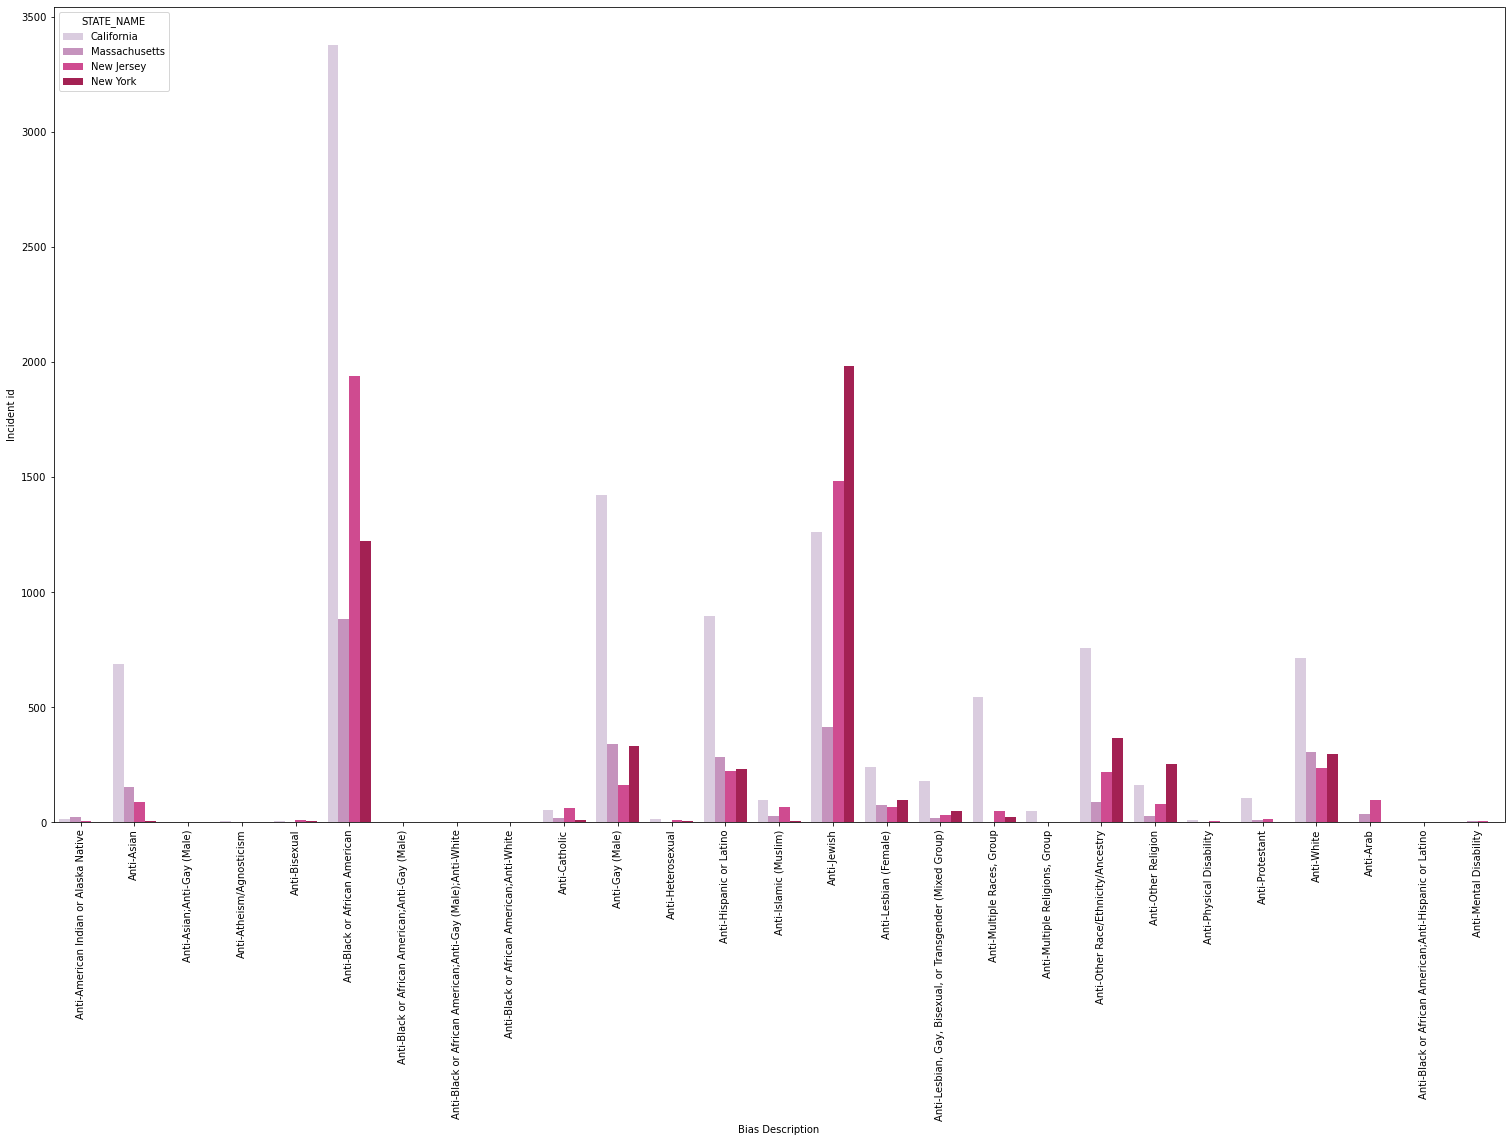

In [107]:
#plot the graph for most criminal states (California, New Jersey, New York, Massachussets)
# in this plot we can see  for every bias the number of crimes in each state 

plt.figure(figsize=(26,15))
graph = sns.barplot(x = 'BIAS_DESC',y = 'INCIDENT_ID', hue = 'STATE_NAME', data = filtered_state1.reset_index(),palette = 'PuRd')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel('Bias Description')
plt.ylabel('Incident id')
#graph.set_xticklabels(graph.set_xticklabels(),rotation = 30)

## Summary of EDA

We have visualized the counted data ov victims to find the years that have the biggest number of victims, beside victims we have also visualized the incident id count data. We have done it because we can have big number of victims, but a few cases.From the visualization we filtered the years that have the most cases and victims. After that, we have grouped our data by the state name to understand in which states, in those years we have the cases.We have found the 4 most criminal states. We have also interested in popular bias descriptions. Now we have grouped the data to see the most popular bias description for the most criminal states in those years. The last graph present the number of cases for each Bias Description and for each state.

# Hypothesis testing

In [108]:
# as we already have seen the biggest number has the bias Anti-Black or African American
#find the ratio of crime of this bias and the total  crime number 


California = filtered_state_order.iloc[0,0]/b.iloc[:,0].sum()
Massachusetts = filtered_state_order.iloc[1,0]/b.iloc[:,3].sum()
New_Jersey= filtered_state_order.iloc[2,0]/b.iloc[:,2].sum()
New_York = filtered_state_order.iloc[3,0]/b.iloc[:,1].sum()

states = [California,Massachusetts,New_Jersey,New_York]
states

[0.319058423142371,
 0.32653817642698296,
 0.4014900662251656,
 0.24984640589801352]

In [109]:
# now we want to understand of the Racism is higher in New Jersey or in Massachussets and if there is any statistical different 
# between their proportions 

# we pick their proportions and construct the null hypothesis 
#H0: p1-p2 = 0 
#H1:p1-p2!=0 
p1 = Massachusetts
p2 = New_Jersey
p_a = (filtered_state_order.iloc[1,0]+filtered_state_order.iloc[2,0])/(b.iloc[:,3].sum()+b.iloc[:,2].sum())
n1 = b.iloc[:,3].sum()
n2 = b.iloc[:,2].sum()

score = (p1-p2)/math.sqrt((p_a*(1-p_a))*(1/n1+1/n2))


In [110]:
p_value = scipy.stats.norm.sf(abs(score))*2
p_value

1.170145819847004e-10

In [111]:
np.round(1.170145819847004e-10,2)

0.0

 we reject the null hypothesisi so there is statistical difference between these two proportions 

In [112]:
#now we are interesting in two states California and New York 
# we want to see if theres is any statistical difference between their means of the crime counted number

filtered_data_hypothesis = data_new.groupby(['DATA_YEAR','STATE_NAME']).count()[['INCIDENT_ID']]
filtered_data_hypothesis.head()

INCIDENT_ID
DATA_YEAR STATE_NAME              
1991      Arizona               43
          Arkansas              11
          California             5
          Colorado             101
          Connecticut           59

In [113]:
f_h = filtered_data_hypothesis.unstack()
filtered_data_hypothesis

INCIDENT_ID
DATA_YEAR STATE_NAME                
1991      Arizona                 43
          Arkansas                11
          California               5
          Colorado               101
          Connecticut             59
...                              ...
2019      Virginia               121
          Washington             412
          West Virginia           44
          Wisconsin               51
          Wyoming                  3

[1382 rows x 1 columns]

In [114]:
h = f_h.sort_values(by = [1997, 2019], axis = 1,ascending = False)
h

INCIDENT_ID                                                      \
STATE_NAME  California New York New Jersey Massachusetts Michigan Maryland   
DATA_YEAR                                                                    
1991               5.0    942.0      776.0         157.0      NaN    319.0   
1992              59.0   1023.0      970.0         346.0     94.0    381.0   
1993             279.0    843.0      974.0         270.0    212.0    321.0   
1994             265.0    863.0      799.0           NaN    206.0    263.0   
1995            1480.0    739.0      694.0         302.0    288.0    286.0   
1996            1738.0    890.0      767.0         420.0    388.0    333.0   
1997            1520.0    800.0      639.0         404.0    335.0    276.0   
1998            1379.0    677.0      705.0         409.0    287.0    239.0   
1999            1541.0    520.0      565.0         391.0    310.0    190.0   
2000            1583.0    601.0      603.0         396.0    321.0    175.0   
2001            1729.0    693.0      717.0         494.0    332.0    200.0   
2002            1255.0    655.0      547.0         358.0    321.0    175.0   
2003            1092.0    532.0      561.0         317.0    322.0    219.0   
2004            1116.0    354.0      723.0         296.0    418.0    221.0   
2005            1148.0    444.0      686.0         319.0    461.0    168.0   
2006            1069.0    441.0      708.0         323.0    489.0    189.0   
2007            1174.0    434.0      704.0         292.0    491.0    140.0   
2008            1149.0    483.0      707.0         273.0    444.0     88.0   
2009             840.0    406.0      522.0         261.0    232.0     91.0   
2010             878.0    412.0      518.0         268.0    247.0     72.0   
2011             854.0    362.0      479.0         297.0    307.0     39.0   
2012             710.0    483.0      474.0         237.0    505.0     27.0   
2013             657.0    352.0      389.0         282.0    254.0     40.0   
2014             603.0    332.0      325.0         306.0    250.0     12.0   
2015             649.0    281.0      317.0         321.0    230.0     31.0   
2016             732.0    386.0      274.0         328.0    318.0     28.0   
2017             708.0     60.0      320.0         354.0    348.0     72.0   
2018             703.0     44.0      428.0         292.0    311.0     33.0   
2019             622.0     49.0      657.0         316.0    307.0     18.0   

                                           ...                         \
STATE_NAME Arizona  Texas Illinois   Ohio  ... West Virginia Nebraska   
DATA_YEAR                                  ...                          
1991          43.0   72.0    102.0   73.0  ...           NaN      NaN   
1992         123.0  378.0    151.0   65.0  ...           NaN      NaN   
1993         160.0  334.0    499.0  142.0  ...           NaN      NaN   
1994         177.0  277.0    161.0  255.0  ...           NaN      NaN   
1995         179.0  248.0     94.0  186.0  ...           NaN      NaN   
1996         198.0  253.0    262.0  189.0  ...           4.0      2.0   
1997         246.0  242.0    238.0  213.0  ...           2.0      2.0   
1998         230.0  240.0    203.0  197.0  ...          13.0     33.0   
1999         204.0  201.0    179.0  165.0  ...          20.0     26.0   
2000         231.0  236.0    134.0  190.0  ...          48.0     14.0   
2001         313.0  364.0    196.0  292.0  ...          27.0     33.0   
2002         186.0  249.0    112.0  197.0  ...          30.0     41.0   
2003         204.0  232.0    158.0  186.0  ...          22.0     31.0   
2004         179.0  225.0    123.0  279.0  ...          33.0     42.0   
2005         157.0  194.0    109.0  145.0  ...          34.0     53.0   
2006         143.0  173.0    121.0  236.0  ...          23.0     32.0   
2007         143.0  183.0    124.0  218.0  ...          34.0     30.0   
2008         150.0  201.0    100.0  277.0  ...        

In [115]:
# we find their mean for california and for new york 
# aa - California, bb- New York 

aa = h.iloc[:,0]
bb = h.iloc[:,1]

In [116]:
scipy.stats.ttest_ind(aa,bb)

Ttest_indResult(statistic=4.265406157922011, pvalue=7.752964313043363e-05)

In [117]:
np.round(7.711936798808524e-05,2)

0.0

we reject the null hypothesis 
we have sufficient evidence to assume that mean of crimes that takes place in California and the mean of the crimes in  New York
have statistical difference 

## Summary 


As we can see, based on this dataset. The most crimes took place in 1995-2001 and have also rised at 2008. 
The most criminal state for the hate crime is New Jersey and after New Jersey comes California, New York and Massachusets.
Based on my reasearch I found out 4 the most popular hate crime biases at USA. These biases are Anti-Black or African American, Anti-Jewish, Anti-White,Anti-Hispanic or Latino.And the most popular bias Anti-Black or African American has the highest percent in New Jersey. 